In [108]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#reading data from csv file
train_data = pd.read_csv('train.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [111]:
#checking missing value
train_data.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [113]:
#filling null value
train_data.Gender = train_data.Gender.fillna('Male')

In [114]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [115]:
train_data.Married = train_data.Married.fillna('Yes')

In [116]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [117]:
train_data.Dependents = train_data.Dependents.fillna('0')

In [118]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [119]:
train_data.Self_Employed = train_data.Self_Employed.fillna('No')

In [120]:
#loan amount is continous value so using mean value for replace
train_data.LoanAmount = train_data.LoanAmount.fillna(train_data.LoanAmount.mean())

In [121]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [122]:
train_data.Loan_Amount_Term = train_data.Loan_Amount_Term.fillna(360.0)

In [123]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [124]:
train_data.Credit_History = train_data.Credit_History.fillna(1.0)

In [125]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [126]:
#preprocessing data for using model
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
train_data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [127]:
#attribute use for training data
X_train = train_data[['Credit_History','Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']]
y_train = train_data['Loan_Status']

In [128]:
from sklearn import decomposition
pca= decomposition.PCA()

In [129]:
pca.n_components=2
X_train=pca.fit_transform(X_train)


In [130]:
X_train=np.vstack((X_train.T,y_train)).T
X_df=pd.DataFrame(data=X_train,columns=("1st","2nd","Loan_Status"))
y_df = y_train

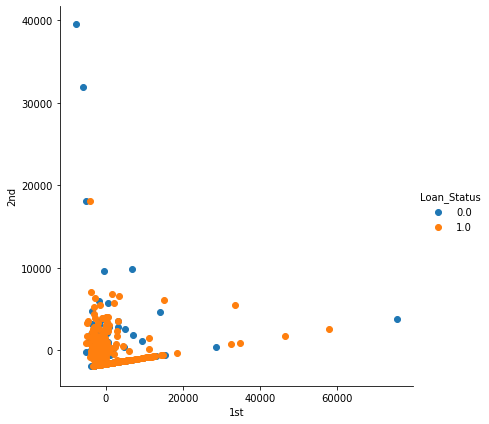

In [131]:
#visualization of data with max two variances
sns.FacetGrid(X_df,hue="Loan_Status",size=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

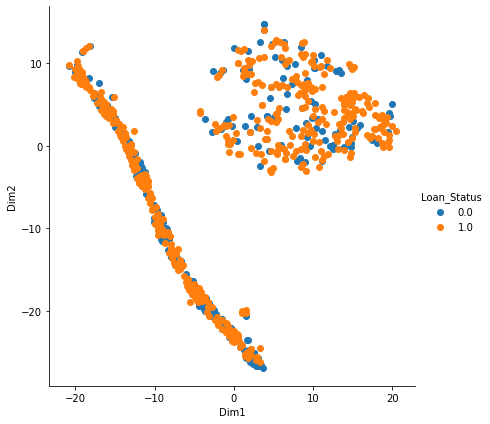

In [132]:
from sklearn.manifold import TSNE
#visualization of data with max two variances using TSNE
#model
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(X_train)
#by default perplextiy=30,itration=1000 and learning rate=200

#visiuliaze
tnse_data=np.vstack((tsne_data.T,y_train)).T
tnse_df=pd.DataFrame(data=tnse_data,columns=("Dim1","Dim2","Loan_Status"))
#plotting
sns.FacetGrid(tnse_df,hue="Loan_Status",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()

In [ ]:
#### LOGISTIC REGRESSION CLASSIFIER ######

In [133]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)

In [134]:
from sklearn.model_selection import cross_val_score
#using k-fold cross validation
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [135]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 1.00 (+/- 0.00)


In [ ]:
#### KNN CLASSIFIER ######

In [136]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
#classifier.fit(X_train, y_train)

In [137]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.67479675, 0.6504065 , 0.71544715, 0.6504065 , 0.69672131])

In [138]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.68 (+/- 0.05)


In [ ]:
#### SVC CLASSIFIER (with poloynomial degree 3)######

In [139]:
#cubic svm
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree=3, random_state = 0)

In [140]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([0.69105691, 0.68292683, 0.68292683, 0.68292683, 0.69672131])

In [141]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.69 (+/- 0.01)


In [ ]:
#### NAIVE BEYES CLASSIFIER ######

In [142]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
#classifier.fit(X_train, y_train)

In [143]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([1.        , 0.99186992, 0.99186992, 0.98373984, 1.        ])

In [144]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.99 (+/- 0.01)


In [ ]:
#### DECISION TREE CLASSIFIER ######

In [145]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)

In [146]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [147]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 1.00 (+/- 0.00)


[Text(167.4, 163.07999999999998, 'X[2] <= 0.5\nentropy = 0.896\nsamples = 614\nvalue = [192, 422]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 192\nvalue = [192, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 422\nvalue = [0, 422]')]

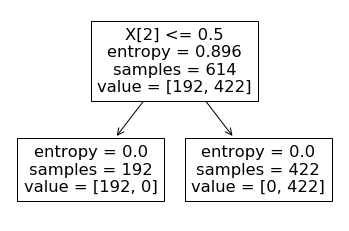

In [148]:
from sklearn import tree
#showing graphical tree classifier
classifier.fit(X_train, y_train)
tree.plot_tree(classifier)

In [ ]:
#### RANDOM FOREST CLASSIFIER ######

In [149]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)

In [150]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [151]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 1.00 (+/- 0.00)


In [ ]:
#### STOCHASTIC GRADIENT DESCENT CLASSIFIER ######

In [152]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
classifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
#classifier.fit(X_train, Y_train)

In [153]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([1.        , 1.        , 1.        , 1.        , 0.98360656])

In [154]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 1.00 (+/- 0.01)


In [ ]:
#### GRADIENT BOSSTING CLASSIFIER ######

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state=0)
#classifier.fit(X_train, y_train)

In [156]:
scores = cross_val_score(classifier, X_df, y_df, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [157]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 1.00 (+/- 0.00)
